In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Read the dataset
diabetes = pd.read_csv('/content/diabetes (3).csv')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [ ]:
diabetes

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.000000,3.000000,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.000000,1.000000,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.000000,3.000000,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.000000,3.000000,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.000000,3.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,54,1,23.4,126,75,6.82,5.00,1.50,1.24,2.98,8.0,3.50,77.0,6.70,1.000000,3.000000,0,1
4299,50,2,22.3,115,84,5.32,4.37,2.09,1.37,2.29,21.2,4.40,47.3,6.55,4.860753,4.860753,0,1
4300,67,1,24.6,138,81,4.85,3.89,1.38,1.14,2.17,18.1,4.73,70.6,6.80,3.000000,3.000000,0,1
4301,60,2,29.0,101,60,6.70,5.91,1.29,1.73,2.85,18.9,7.33,50.2,7.00,3.000000,3.000000,0,1


In [ ]:
df = diabetes.copy()

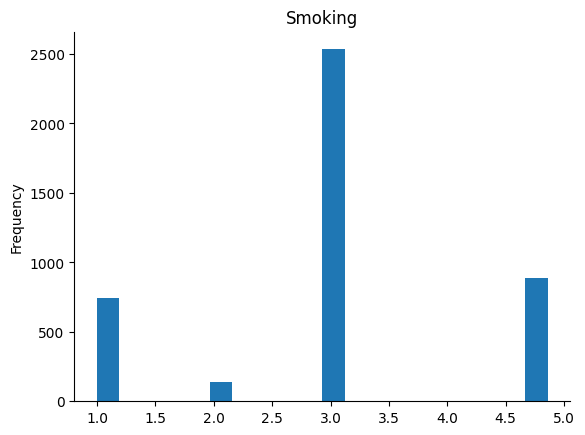

In [ ]:
# @title Smoking

from matplotlib import pyplot as plt
diabetes['smoking'].plot(kind='hist', bins=20, title='Smoking')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def replace_values(data):
    for i in range(len(data)):
        if data[i] == 2:
            data[i] = 1
        elif data[i] > 3:
            data[i] = 3
    return data


In [ ]:
df['smoking'] = replace_values(df['smoking'].copy())

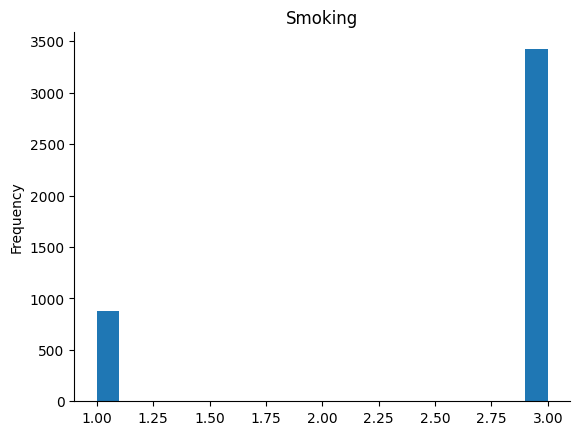

In [ ]:
from matplotlib import pyplot as plt
df['smoking'].plot(kind='hist', bins=20, title='Smoking')
plt.gca().spines[['top', 'right',]].set_visible(False)

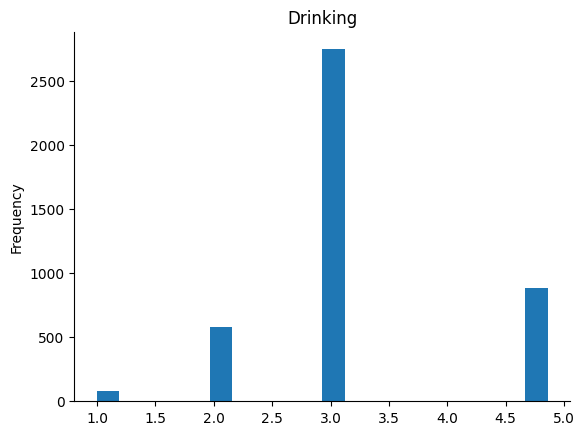

In [ ]:
# @title Drinking

from matplotlib import pyplot as plt
diabetes['drinking'].plot(kind='hist', bins=20, title='Drinking')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['drinking'] = replace_values(df['drinking'].copy())

In [ ]:
diabetes.duplicated().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
diabetes["Diabetes"].value_counts()

Diabetes
0    3000
1    1303
Name: count, dtype: int64

In [ ]:
total_samples = len(df)
positive_samples = df[df['Diabetes'] == 1].shape[0]
negative_samples = df[df['Diabetes'] == 0].shape[0]

positive_percentage = (positive_samples / total_samples) * 100
negative_percentage = (negative_samples / total_samples) * 100

print("Number of True cases:  {0} ({1:2.2f}%)".format(positive_samples, positive_percentage))
print("Number of False cases: {0} ({1:2.2f}%)".format(negative_samples, negative_percentage))


Number of True cases:  1303 (30.28%)
Number of False cases: 3000 (69.72%)


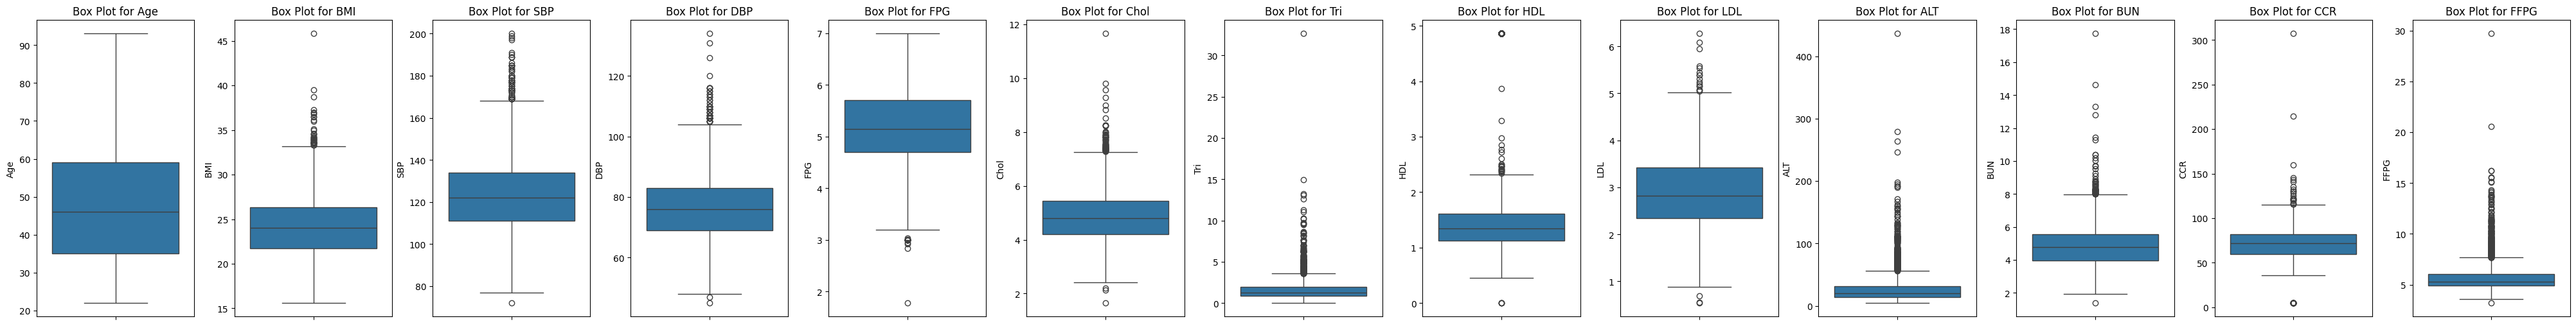

In [ ]:
#Identifikasi outlier
numeric_columns = df.columns.drop(['Diabetes','smoking','drinking','Gender','family_histroy'])
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(40, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize setiap kolom
for column in numeric_columns:
    df[column] = winsorize(df[column], limits=[0.1, 0.1])

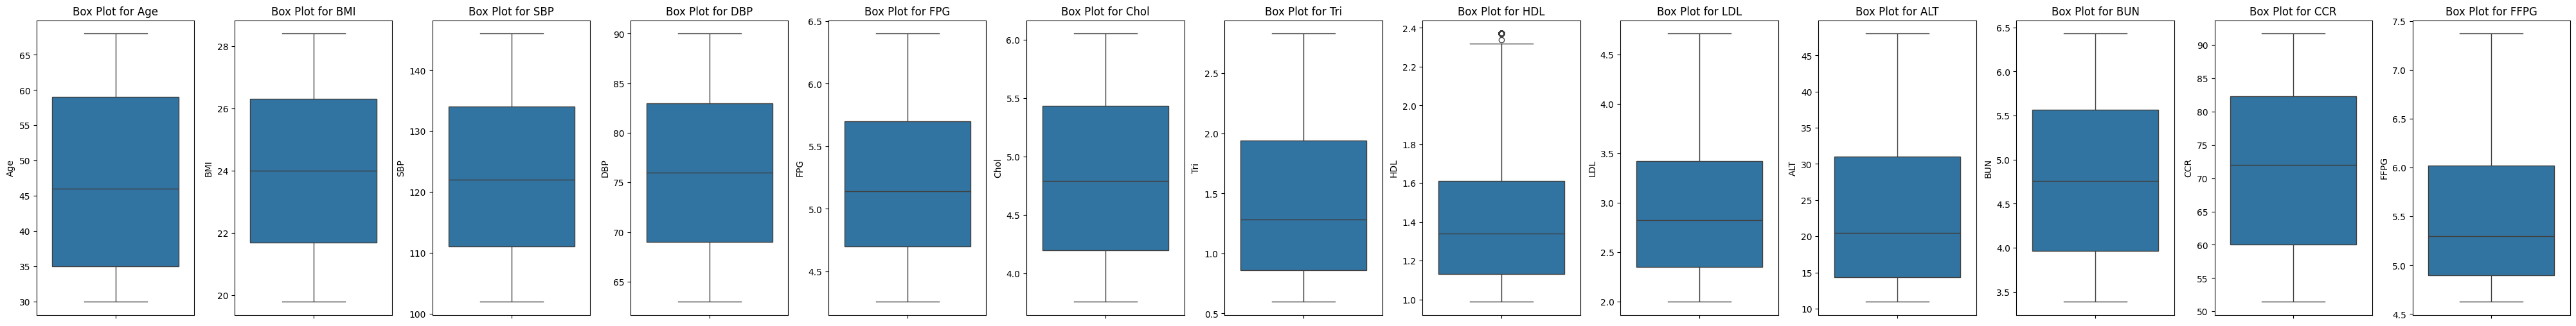

In [ ]:
#Identifikasi outlier
numeric_columns = df.columns.drop(['Diabetes','smoking','drinking','Gender','family_histroy'])
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(40, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
df.shape

(4303, 18)

In [ ]:
# Separate df_onehot to be X and y
X = df.drop(columns=['Diabetes'])  # Features
y = df['Diabetes']  # Target variable

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")



FFPG: 0.29980257694438994
FPG: 0.15305531116851043
Age: 0.1190584679558776
LDL: 0.09861852240917372
HDL: 0.08570802022174007
SBP: 0.030440507395917013
BMI: 0.029062279323520675
BUN: 0.026842420669696193
ALT: 0.026575833363161307
Tri: 0.02621624100775485
CCR: 0.024996752829249104
Chol: 0.02452063423575699
DBP: 0.02295495906506174
smoking: 0.014758517978288942
drinking: 0.010822722089015229
Gender: 0.003775562504952856
family_histroy: 0.00279067083793324


In [ ]:
# Mendapatkan pentingnya fitur
importances = model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
indices = np.argsort(importances)[::-1]

# Mendapatkan nama kolom dari 5 fitur teratas
top_features = [X.columns[indices[f]] for f in range(6)]

# Memilih data dengan fitur yang dipilih
X = X[top_features]

In [ ]:
X

,FFPG,FPG,Age,LDL,HDL,SBP
0,5.40,5.80,30,2.43,0.99,119
1,4.63,4.60,40,2.04,1.50,102
2,4.85,5.30,40,3.37,1.75,102
3,5.30,4.50,43,2.60,1.27,111
4,5.53,5.54,36,3.64,0.99,130
...,...,...,...,...,...,...
4298,6.70,6.40,54,2.98,1.24,126
4299,6.55,5.32,50,2.29,1.37,115
4300,6.80,4.85,67,2.17,1.14,138
4301,7.00,6.40,60,2.85,1.73,102


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4298    1
4299    1
4300    1
4301    1
4302    1
Name: Diabetes, Length: 4303, dtype: int64

In [ ]:
# Pemisahan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45545)

In [ ]:
pd.DataFrame(X_test)

,FFPG,FPG,Age,LDL,HDL,SBP
4021,5.33,5.19,68,3.79,1.46,146
44,4.63,5.13,41,2.00,1.37,104
107,6.73,5.64,43,2.41,1.33,117
535,5.00,5.00,48,2.99,1.59,102
1627,6.10,5.19,59,2.62,1.14,136
...,...,...,...,...,...,...
785,5.40,4.40,48,2.86,1.64,102
1617,4.77,4.43,58,2.46,1.05,128
888,5.20,5.04,60,2.07,1.55,138
1767,4.66,5.50,68,2.60,1.72,129


In [ ]:
# Normalisasi data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X))
print(len(y))

print(len(X_train)+len(X_test))

3442
3442
861
861
4303
4303
4303


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (

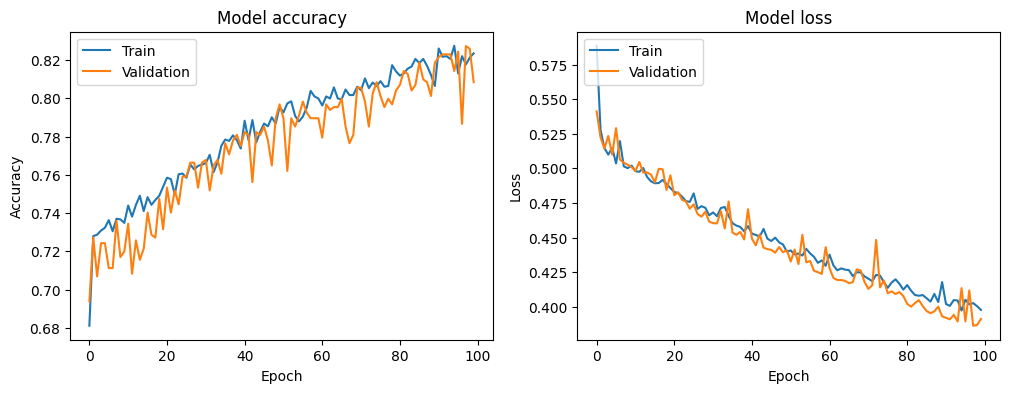

27/27 [==============================] - 0s 2ms/step


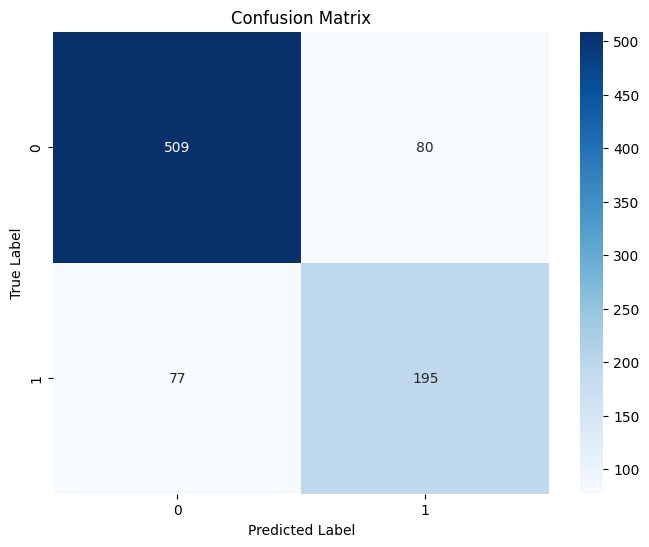

In [ ]:
# Define the model with added regularization and dropout layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_dim = X_train.shape[1], activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict the values from the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
y_test.value_counts()

Diabetes
0    589
1    272
Name: count, dtype: int64

In [ ]:
model.save("/content/Diabetes tanpa norm.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/Diabetes tanpa norm.h5")

In [ ]:
#FFPG = Final Fasting Plasma Glucose
#FPG = Fasting Plasma Glucose
#Age = Age of patient
#HDL = High-Density Lipoprotein
#LDL = Low-Density Lipoprotein
#SBP = Systolic Blood Pressure

# Semua input merupakan data numeric (int/float)

In [ ]:
# Asumsikan model sudah dilatih dan disimpan di 'Diabetes.h5'
# Load model (pastikan file model.h5 ada di direktori kerja Anda)
model = load_model('Diabetes tanpa norm.h5')

In [ ]:
data_dummy = {
    'FFPG': [5],
    'FPG': [4.78],
    'Age': [34],
    'HDL': [0.97],
    'LDL' : [3.32],
    'SBP': [130]
}

new_df = pd.DataFrame(data_dummy)

# Prediksi dengan model
predictions = model.predict(new_df)

# Output hasil prediksi
print("Prediksi probabilitas Diabetes:", predictions)

# Konversi probabilitas menjadi kelas biner
predicted_classes = (predictions > 0.5).astype("int32")
print("Prediksi kelas Diabetes (1: Ya, 0: Tidak):", predicted_classes)


1/1 [==============================] - 0s 39ms/step
Prediksi probabilitas Diabetes: [[0.02200396]]
Prediksi kelas Diabetes (1: Ya, 0: Tidak): [[0]]
